In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import random

import os

In [2]:
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [3]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/learn_to/analisis_datos_sociales/Corpus_seleccionado/plebiLaura/")
os.getcwd()

'/home/csarmiento/Documentos/learn_to/analisis_datos_sociales/Corpus_seleccionado/plebiLaura'

#### Todos X la Paz 

In [4]:
df= pd.read_json(r"todosxlapazcol.json")
df.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
0,2016-10-27 13:56:22,2,2602,791639681154813952,None,1,todosxlapazcol,Camilo entrega petición para que Jorge Barón l...
1,2016-10-20 23:01:08,9,2602,789240061057441792,None,9,todosxlapazcol,"""¡Paz, Paz, Colombia quiere Paz!"" Los colombia..."
2,2016-10-20 22:43:54,26,2602,789235724352688128,None,18,todosxlapazcol,"Jóvenes, viejos.. Aquí ya no hay diferencia. T..."
3,2016-10-20 22:23:52,4,2602,789230681612320768,None,5,todosxlapazcol,Arrancó la #GranMarchaColombiaPacifica. ¿Ya es...
4,2016-10-20 17:31:40,2,2602,789157148060164096,None,3,todosxlapazcol,¿Ya #EstamosListos para la #GranMarchaColombia...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_at               2690 non-null   datetime64[ns]
 1   favorite_count           2690 non-null   int64         
 2   followers_count          2690 non-null   int64         
 3   id_str                   2690 non-null   int64         
 4   in_reply_to_screen_name  8 non-null      object        
 5   retweet_count            2690 non-null   int64         
 6   screen_name              2690 non-null   object        
 7   text                     2690 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 168.2+ KB


In [6]:
df_cut= df[df["created_at"]<="2016-10-02 23:59:59"]
df1=df[(df["created_at"]>="2016-01-01 00:00:00") & (df["created_at"]<="2016-04-30 23:59:59")]
df2=df[(df["created_at"]>="2016-05-01 00:00:00") & (df["created_at"]<="2016-07-31 23:59:59")]
df3=df[(df["created_at"]>="2016-08-01 00:00:00") & (df["created_at"]<="2016-10-02 23:59:59")]

In [7]:
print("numero total de tuits", df.shape[0])
print("numero de tuits hasta el 02-10", df_cut.shape[0])
print("numero de tuits, primer periodo", df1.shape[0])
print("numero de tuits, segundo periodo", df2.shape[0])
print("numero de tuits, tercer periodo", df3.shape[0])

numero total de tuits 2690
numero de tuits hasta el 02-10 2672
numero de tuits, primer periodo 125
numero de tuits, segundo periodo 467
numero de tuits, tercer periodo 2080


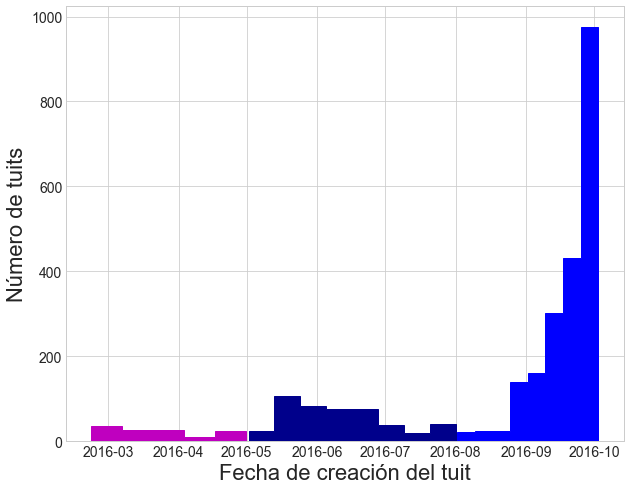

In [8]:
plt.figure(figsize=(10,8))
#plt.hist(df_cut["created_at"], bins=25, histtype='step', color="b", linewidth=2, fill=False);
plt.hist(df1["created_at"], bins=5, histtype='step', color="m", linewidth=1, fill=True);
plt.hist(df2["created_at"], bins=8, histtype='step', color="darkblue", linewidth=1, fill=True);
plt.hist(df3["created_at"], bins=8, histtype='step', color="b", linewidth=1, fill=True)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.show()

In [9]:
df.iloc[10, 7]

'Hoy Bogotá marcha por las víctimas; para que ellos y todos nosotros, tengamos la paz que tanto anhelamos. #TodosPorLaPaz #AcuerdoYa https://t.co/8g7KekAcf3'

In [10]:
#df["retweet_count"].max()
np.max(df["retweet_count"])

13427

In [11]:
df_RT= df[df["retweet_count"]==13427]

In [12]:
df_RT.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
390,2016-09-30 22:17:15,0,2602,781981261657243648,None,13427,todosxlapazcol,"RT @Pontifex_es: Señor Jesús, extiende la somb..."


In [13]:
df.iloc[390, 7]

'RT @Pontifex_es: Señor Jesús, extiende la sombra de tu cruz sobre los pueblos en guerra: que aprendan el camino de la reconciliación, el di…'

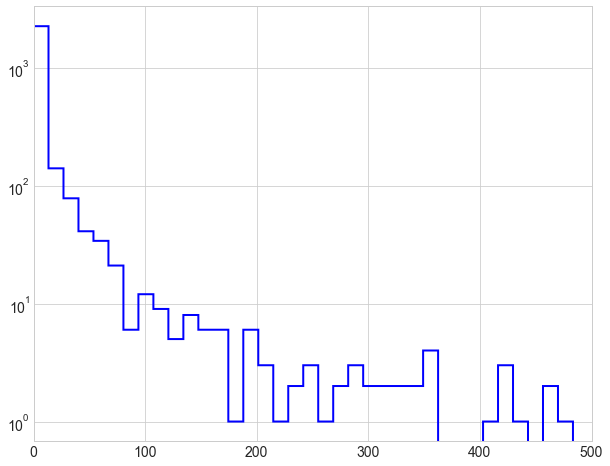

In [14]:
plt.figure(figsize=(10,8))
plt.hist(df["retweet_count"], bins=1000, histtype='step', color="b", linewidth=2, fill=False);
plt.xlim(0,500)
plt.yscale("log")
plt.show()

#### Estrategía de Paz

In [15]:
dg= pd.read_csv(r"estrategiadepaz_tweets.csv")
dg.head()

,id,created_at,text,retweet_count,favorite_count
0,1098987979085938694,2019-02-22 16:48:47,RT @herrerak11: “Falta mucho. Esto es complejo...,4,0
1,1098982801259614208,2019-02-22 16:28:12,RT @herrerak11: “46.612 vidas perdimos. Y digo...,5,0
2,1098980054250516480,2019-02-22 16:17:17,RT @herrerak11: “Olvidar a las víctimas es mat...,2,0
3,1096985902155481093,2019-02-17 04:13:14,RT @RevistaSemana: #YoDefiendoLaJEP | Si el go...,1558,0
4,1096985884598194178,2019-02-17 04:13:10,RT @juliandezubiria: En Colombia hay sectores ...,501,0


In [16]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1883 non-null   int64 
 1   created_at      1883 non-null   object
 2   text            1883 non-null   object
 3   retweet_count   1883 non-null   int64 
 4   favorite_count  1883 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 73.7+ KB


In [17]:
dg['created_at'] = dg['created_at'].astype('datetime64')

In [18]:
dg_cut= dg[dg["created_at"]<="2016-10-02 23:59:59"]
dg1=dg[(dg["created_at"]>="2016-01-01 00:00:00") & (dg["created_at"]<="2016-04-30 23:59:59")]
dg2=dg[(dg["created_at"]>="2016-05-01 00:00:00") & (dg["created_at"]<="2016-07-31 23:59:59")]
dg3=dg[(dg["created_at"]>="2016-08-01 00:00:00") & (dg["created_at"]<="2016-10-02 23:59:59")]

In [19]:
print("numero total de tuits", dg.shape[0])
print("numero de tuits hasta el 02-10", dg_cut.shape[0])
print("numero de tuits, primer periodo", dg1.shape[0])
print("numero de tuits, segundo periodo", dg2.shape[0])
print("numero de tuits, tercer periodo", dg3.shape[0])

numero total de tuits 1883
numero de tuits hasta el 02-10 790
numero de tuits, primer periodo 345
numero de tuits, segundo periodo 361
numero de tuits, tercer periodo 84


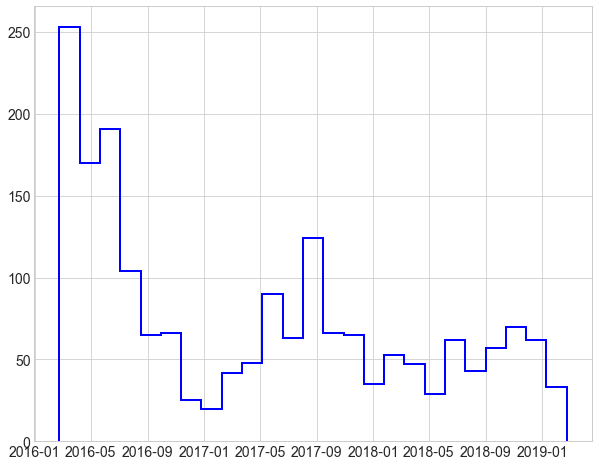

In [20]:
plt.figure(figsize=(10,8))
plt.hist(dg["created_at"], bins=25, histtype='step', color="b", linewidth=2, fill=False);

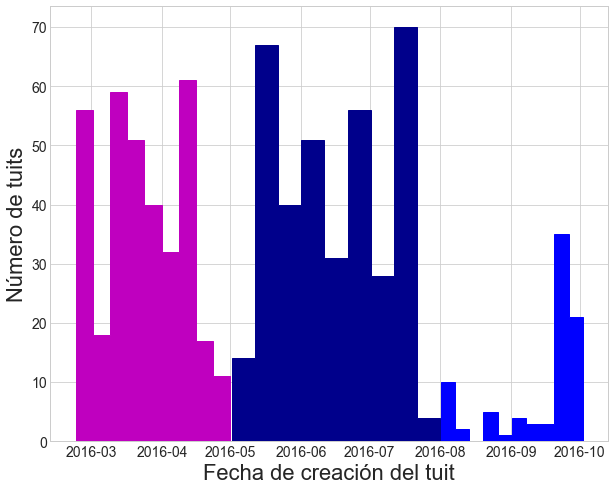

In [21]:
plt.figure(figsize=(10,8))
#plt.hist(dg_cut["created_at"], bins=25, histtype='step', color="b", linewidth=2, fill=False);
plt.hist(dg1["created_at"], bins=9, histtype='step', color="m", linewidth=1, fill=True);
plt.hist(dg2["created_at"], bins=9, histtype='step', color="darkblue", linewidth=1, fill=True);
plt.hist(dg3["created_at"], bins=10, histtype='step', color="b", linewidth=1, fill=True)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.show()

#### Forjando Paz

In [22]:
dh= pd.read_csv(r"FORJANDOPAZ_tweets.csv")
dh.head()

,id,created_at,text,retweet_count,favorite_count
0,1189326560807063557,2019-10-29 23:42:03,RT @ACIN_Cauca: Declaramos estado de emergenci...,125,0
1,1170360435192868865,2019-09-07 15:37:26,RT @FORJANDOPAZ: ¿Quienes son solo paganinis d...,5,0
2,1065085689866403841,2018-11-21 03:33:11,RT @CesPazCol: ¿Qué está pasando en los territ...,11,0
3,1065085630475116544,2018-11-21 03:32:57,RT @CesPazCol: Importante visita a COLOMBIA de...,3,0
4,1043124232148934656,2018-09-21 13:06:11,RT @seamos: Somos los jóvenes los que tenemos ...,11,0


In [23]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1523 non-null   int64 
 1   created_at      1523 non-null   object
 2   text            1523 non-null   object
 3   retweet_count   1523 non-null   int64 
 4   favorite_count  1523 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 59.6+ KB


In [24]:
dh['created_at'] = dh['created_at'].astype('datetime64')

In [25]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1523 non-null   int64         
 1   created_at      1523 non-null   datetime64[ns]
 2   text            1523 non-null   object        
 3   retweet_count   1523 non-null   int64         
 4   favorite_count  1523 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 59.6+ KB


In [26]:
dh.iloc[1, 1], dh.iloc[1, 2]

(Timestamp('2019-09-07 15:37:26'),
 'RT @FORJANDOPAZ: ¿Quienes son solo paganinis de #ElChicharrónDeLaTierra en Colombia?  #PorElSÍ https://t.co/X2YWU0xgpW')

In [27]:
dh_cut= dh[dh["created_at"]<"2016-10-02"]

In [28]:
dh_cut= dh[dh["created_at"]<="2016-10-02 23:59:59"]
dh1=dh[(dh["created_at"]>="2016-01-01 00:00:00") & (dh["created_at"]<="2016-04-30 23:59:59")]
dh2=dh[(dh["created_at"]>="2016-05-01 00:00:00") & (dh["created_at"]<="2016-07-31 23:59:59")]
dh3=dh[(dh["created_at"]>="2016-08-01 00:00:00") & (dh["created_at"]<="2016-10-02 23:59:59")]

In [29]:
print("numero total de tuits", dh.shape[0])
print("numero de tuits hasta el 02-10", dh_cut.shape[0])
print("numero de tuits, primer periodo", dh1.shape[0])
print("numero de tuits, segundo periodo", dh2.shape[0])
print("numero de tuits, tercer periodo", dh3.shape[0])

numero total de tuits 1523
numero de tuits hasta el 02-10 751
numero de tuits, primer periodo 0
numero de tuits, segundo periodo 369
numero de tuits, tercer periodo 382


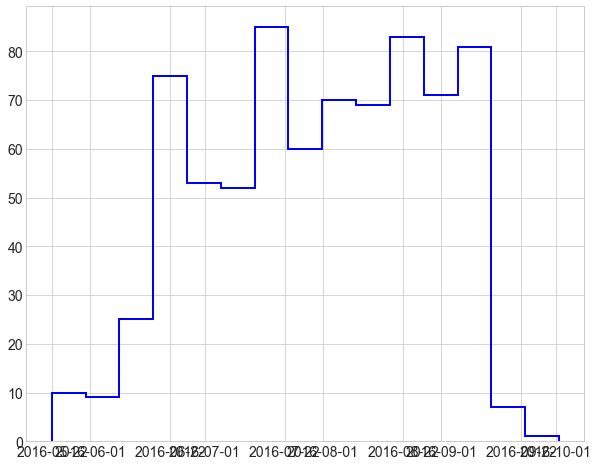

In [30]:
plt.figure(figsize=(10,8))
plt.hist(dh_cut["created_at"], bins=15, histtype='step', color="b", linewidth=2, fill=False);

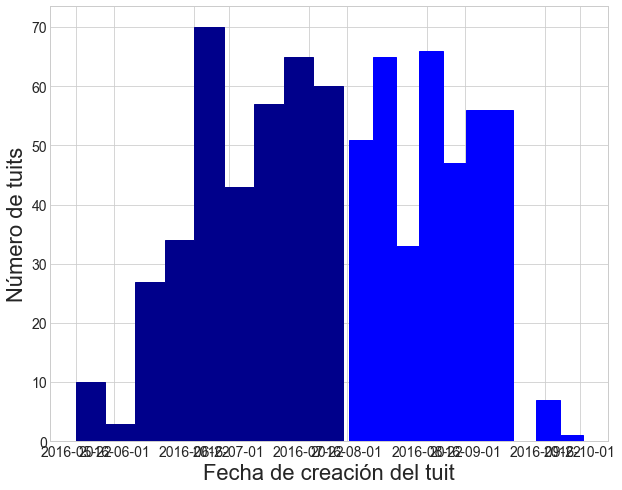

In [31]:
plt.figure(figsize=(10,8))
#plt.hist(dh_cut["created_at"], bins=25, histtype='step', color="b", linewidth=2, fill=False);
#plt.hist(dh1["created_at"], bins=9, histtype='step', color="m", linewidth=1, fill=True);
plt.hist(dh2["created_at"], bins=9, histtype='step', color="darkblue", linewidth=1, fill=True);
plt.hist(dh3["created_at"], bins=10, histtype='step', color="b", linewidth=1, fill=True)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.show()

In [32]:
print(df.iloc[6, 7])

#EstamosListos para construir juntos una mejor 🇨🇴. ¿Y tú?
Mañana #oct20, #GranMarchaColombiaPacífica.  Planetario, 5pm 💛💙❤️ https://t.co/GzT79dKl6Y


In [33]:
df.count()

created_at                 2690
favorite_count             2690
followers_count            2690
id_str                     2690
in_reply_to_screen_name       8
retweet_count              2690
screen_name                2690
text                       2690
dtype: int64

In [34]:
print(df.shape[0])

2690


In [35]:
nt=df.shape[0]
r=np.linspace(0,nt,nt+1).tolist()
ct=random.sample(r, int(nt*0.2))
print(len(ct))

538


In [36]:
for i in range(2):
    print(df.iloc[int(ct[i]), 0], df.iloc[int(ct[i]), 7])

2016-09-02 17:14:33 RT @JulianArevaloB: El Externado dice #ObvioQueSi https://t.co/aWP3rOg9pt
2016-10-02 18:53:18 #HoyVotoSiALaPaz https://t.co/wQcdHTWFxp


In [37]:
import csv

In [38]:
tt=[]
dx = pd.DataFrame()
def eligetuits(dx, x):
    nt=dx.shape[0]
    r=np.linspace(0,nt,nt+1).tolist()
    ct=random.sample(r, int(nt*x))
    print(len(ct))

    for i in range(len(ct)):
        print(dx.iloc[int(ct[i]), 1],";\t",dx.iloc[int(ct[i]), 2],"\n")
        #tt.append([dx.iloc[int(ct[i]), 0], dx.iloc[int(ct[i]), 7]])
        

In [40]:
eligetuits(dh3, 0.2);

76
2016-08-29 04:47:48 ;	 #CeseAlFuegoDefinitivo llegó la hora de decirle SÍ a la paz https://t.co/bYxk7XIK4z 

2016-09-09 14:07:27 ;	 #LaGranEncuesta muestra un SÍ contundente de Colombianos cansados de la guerra   #BuenViernes https://t.co/ktOvetqNrG 

2016-08-26 17:55:42 ;	 La oportunidad es ahora, la decisión es nuestra, vamos por el SÍ que es nuestro derecho #LaPazSiEsContigo https://t.co/xpjJ7u4I23 

2016-08-11 17:05:43 ;	 Estamos con padres de familia del jardín infantil Gato con Botas #ForjandoPaz. Pedagogía sobre los acuerdos de paz https://t.co/jurmxQt8wx 

2016-08-01 13:16:20 ;	 Tunjuelito pedalea por la Paz y la esperanza de construir una nueva Colombia #BiciPAZeo https://t.co/iN3JrG0GPa 

2016-08-14 16:17:08 ;	 La escuela y su papel en el proceso de paz https://t.co/1sxLfQHJZR 

2016-08-23 00:38:48 ;	 Fortalecer la economía campesina es uno de los acuerdos en la negociación entre Gobierno y FARC #VotaSÍaLaPaz https://t.co/wqUe7BkGKJ 

2016-08-30 13:11:25 ;	 RT @plantamaril

In [41]:
with open('writeData.csv', mode='w', newline="") as file:
    writer = csv.writer(file, delimiter=",")

    #way to write to csv file
    writer.writerow(tt)

In [43]:
print("tuits primera parte", int((df1.shape[0]+dg1.shape[0]+dh1.shape[0])*0.2))
print("tuits primera parte", int((df2.shape[0]+dg2.shape[0]+dh2.shape[0])*0.2))
print("tuits primera parte", int((df3.shape[0]+dg3.shape[0]+dh3.shape[0])*0.2))

tuits primera parte 94
tuits primera parte 239
tuits primera parte 509


# Tuits del NO

### La tal Paz

In [44]:
da= pd.read_json(r"latalpaz.json")
da.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
0,2018-05-22 23:33:15,1,8753,999070719232434176,None,2,latalpas,Hasta el que redacto la falsa paz; afirma que ...
1,2018-05-20 23:51:15,0,8753,998350473152221184,isislopez_1983,0,latalpas,@isislopez_1983 @argiro1961 Mucho guevon cree ...
2,2018-05-17 15:14:20,0,8753,997133220952133632,None,21,latalpas,RT @papel_periodico: La JEP suspende la extrad...
3,2018-05-17 13:45:25,0,8753,997110843199442944,None,344,latalpas,RT @jorgeborjajp: Para mí la JEP no es más que...
4,2018-05-17 06:12:06,0,8753,996996762111021056,None,469,latalpas,RT @jbagbam74: Que las Farc sacaran 50.000 vot...


In [45]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_at               3185 non-null   datetime64[ns]
 1   favorite_count           3185 non-null   int64         
 2   followers_count          3185 non-null   int64         
 3   id_str                   3185 non-null   int64         
 4   in_reply_to_screen_name  227 non-null    object        
 5   retweet_count            3185 non-null   int64         
 6   screen_name              3185 non-null   object        
 7   text                     3185 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 199.2+ KB


In [46]:
da_cut= da[da["created_at"]<"2016-10-02"]
da1=da[(da["created_at"]>="2016-01-01 00:00:00") & (da["created_at"]<="2016-04-30 23:59:59")]
da2=da[(da["created_at"]>="2016-05-01 00:00:00") & (da["created_at"]<="2016-07-31 23:59:59")]
da3=da[(da["created_at"]>="2016-08-01 00:00:00") & (da["created_at"]<="2016-10-02 23:59:59")]

In [47]:
print("numero total de tuits", da.shape[0])
print("numero de tuits hasta el 02-10", da_cut.shape[0])
print("numero de tuits, primer periodo", da1.shape[0])
print("numero de tuits, segundo periodo", da2.shape[0])
print("numero de tuits, tercer periodo", da3.shape[0])

numero total de tuits 3185
numero de tuits hasta el 02-10 1059
numero de tuits, primer periodo 443
numero de tuits, segundo periodo 436
numero de tuits, tercer periodo 186


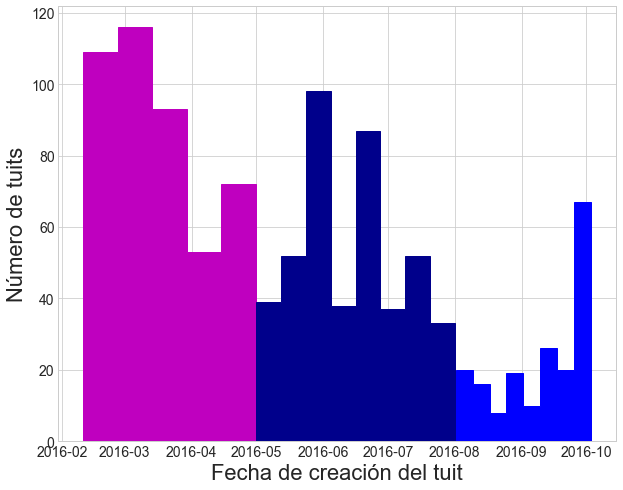

In [48]:
plt.figure(figsize=(10,8))
#plt.hist(da_cut["created_at"], bins=25, histtype='step', color="b", linewidth=2, fill=False);
plt.hist(da1["created_at"], bins=5, histtype='step', color="m", linewidth=1, fill=True);
plt.hist(da2["created_at"], bins=8, histtype='step', color="darkblue", linewidth=1, fill=True);
plt.hist(da3["created_at"], bins=8, histtype='step', color="b", linewidth=1, fill=True)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.show()

In [49]:
da.iloc[10, 7]

'RT @plebisantos: Señores terroristas FARC, ustedes por que firmaron la tal pas con Santos, pero no con Uribe y Pastrana ? Es que nos regala…'

In [50]:
#df["retweet_count"].max()
np.max(da["retweet_count"])

8206

In [51]:
da_RT= da[da["retweet_count"]==8206]

In [52]:
da_RT.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
1842,2017-04-24 04:21:01,0,8753,856362315809206272,None,8206,latalpas,RT @MariaCorinaYA: Régimen busca desdesperadam...


In [53]:
print(da.iloc[1842, 7])

RT @MariaCorinaYA: Régimen busca desdesperadamente ganar tiempo,desactivar la presión d la calle y distraernos d nuestro único objetivo: la…


### La tal Paz

In [54]:
db= pd.read_json(r"UniversidadesCD.json")
db.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
0,2018-05-23 04:03:54,0,1046,999138827326382080,None,1640,UniversidadesCD,RT @Lizz_Bennet: Mi hijo aún no tenía definido...
1,2018-05-23 04:02:49,0,1046,999138557452345344,None,1059,UniversidadesCD,RT @AlfredoRamosM: La Senadora/candidata a que...
2,2018-05-21 22:54:09,0,1046,998698487993774080,None,1380,UniversidadesCD,RT @IvanDuque: Yo no tengo compromisos de mini...
3,2018-05-21 13:46:07,0,1046,998560572546437120,None,806,UniversidadesCD,"RT @IvanDuque: ¡Gracias, Bogotá! Aquí estamos ..."
4,2018-05-21 13:46:05,0,1046,998560562610102272,None,18199,UniversidadesCD,RT @marcorubio: El 20 de Mayo una farsa total ...


In [55]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_at               2871 non-null   datetime64[ns]
 1   favorite_count           2871 non-null   int64         
 2   followers_count          2871 non-null   int64         
 3   id_str                   2871 non-null   int64         
 4   in_reply_to_screen_name  21 non-null     object        
 5   retweet_count            2871 non-null   int64         
 6   screen_name              2871 non-null   object        
 7   text                     2871 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 179.6+ KB


In [56]:
db_cut= db[db["created_at"]<"2016-10-02"]
db1=db[(db["created_at"]>="2016-01-01 00:00:00") & (db["created_at"]<="2016-04-30 23:59:59")]
db2=db[(db["created_at"]>="2016-05-01 00:00:00") & (db["created_at"]<="2016-07-31 23:59:59")]
db3=db[(db["created_at"]>="2016-08-01 00:00:00") & (db["created_at"]<="2016-10-02 23:59:59")]

In [57]:
print("numero total de tuits", db.shape[0])
print("numero de tuits hasta el 02-10", db_cut.shape[0])
print("numero de tuits, primer periodo", db1.shape[0])
print("numero de tuits, segundo periodo", db2.shape[0])
print("numero de tuits, tercer periodo", db3.shape[0])

numero total de tuits 2871
numero de tuits hasta el 02-10 492
numero de tuits, primer periodo 194
numero de tuits, segundo periodo 209
numero de tuits, tercer periodo 93


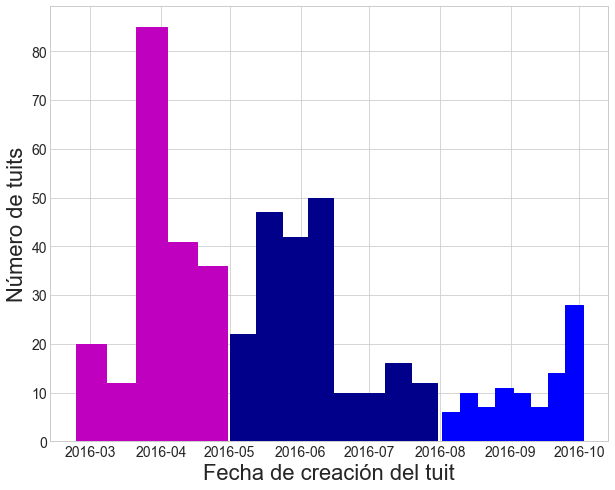

In [58]:
plt.figure(figsize=(10,8))
#plt.hist(db_cut["created_at"], bins=25, histtype='step', color="b", linewidth=2, fill=False);
plt.hist(db1["created_at"], bins=5, histtype='step', color="m", linewidth=1, fill=True);
plt.hist(db2["created_at"], bins=8, histtype='step', color="darkblue", linewidth=1, fill=True);
plt.hist(db3["created_at"], bins=8, histtype='step', color="b", linewidth=1, fill=True)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.show()

In [59]:
db.iloc[10, 7]

'RT @mluciaramirez: Que no nos quepa ninguna duda: Cuando Petro dice que va a comprarle a algunos colombianos sus propiedades a las buenas o…'

In [60]:
#df["retweet_count"].max()
np.max(db["retweet_count"])

25820

In [61]:
db_RT= db[db["retweet_count"]==25820]

In [62]:
db_RT.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
1928,2017-03-30 22:48:37,0,1046,847581358469693440,None,25820,UniversidadesCD,RT @ppkamigo: Condeno la ruptura de la democra...


In [63]:
print(db.iloc[1928, 7])

RT @ppkamigo: Condeno la ruptura de la democracia en Venezuela. Retiro de manera definitiva a mi Embajador en ese país. https://t.co/SIpJ7J…


### La tal Paz

In [64]:
dc= pd.read_json(r"MiVotoEsNo.json")
dc.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
0,2018-10-05 15:25:01,10,7498,1048232597636218880,None,6,MiVotoEsNO,Atentos #Barranquilla hoy vigilia por la liber...
1,2018-10-05 15:13:45,3,7498,1048229764241272832,None,4,MiVotoEsNO,"Atentos #Medellín, hoy a las 6:30 pm, vigilia ..."
2,2018-05-23 22:46:12,1,7498,999421263079755776,paoguerreroi,0,MiVotoEsNO,"@paoguerreroi Qué perrito tan dulce, y esas pa..."
3,2018-04-14 15:28:11,3,7498,985177909114662912,None,7,MiVotoEsNO,#NoALasCurulesParaFarc https://t.co/IsFKyLCbmH
4,2018-04-14 15:25:16,3,7498,985177172213207040,None,0,MiVotoEsNO,#NoALasCurulesParaFarc


In [65]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_at               3200 non-null   datetime64[ns]
 1   favorite_count           3200 non-null   int64         
 2   followers_count          3200 non-null   int64         
 3   id_str                   3200 non-null   int64         
 4   in_reply_to_screen_name  119 non-null    object        
 5   retweet_count            3200 non-null   int64         
 6   screen_name              3200 non-null   object        
 7   text                     3200 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 200.1+ KB


In [66]:
dc_cut= dc[dc["created_at"]<"2016-10-02"]
dc1=dc[(dc["created_at"]>="2016-01-01 00:00:00") & (dc["created_at"]<="2016-04-30 23:59:59")]
dc2=dc[(dc["created_at"]>="2016-05-01 00:00:00") & (dc["created_at"]<="2016-07-31 23:59:59")]
dc3=dc[(dc["created_at"]>="2016-08-01 00:00:00") & (dc["created_at"]<="2016-10-02 23:59:59")]

In [67]:
print("numero total de tuits", dc.shape[0])
print("numero de tuits hasta el 02-10", dc_cut.shape[0])
print("numero de tuits, primer periodo", dc1.shape[0])
print("numero de tuits, segundo periodo", dc2.shape[0])
print("numero de tuits, tercer periodo", dc3.shape[0])

numero total de tuits 3200
numero de tuits hasta el 02-10 2711
numero de tuits, primer periodo 0
numero de tuits, segundo periodo 1726
numero de tuits, tercer periodo 509


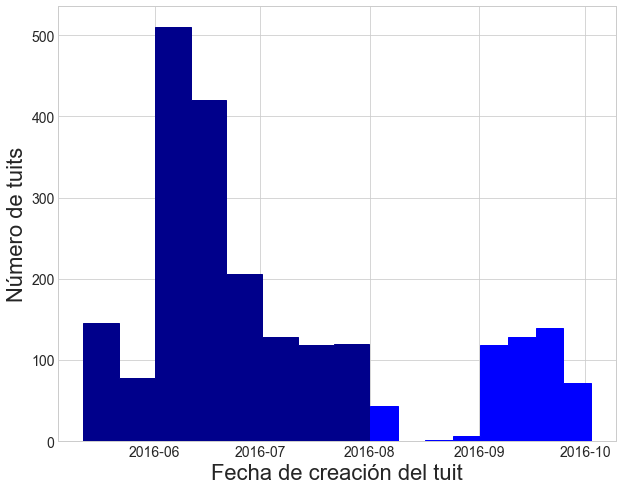

In [68]:
plt.figure(figsize=(10,8))
#plt.hist(dc_cut["created_at"], bins=25, histtype='step', color="b", linewidth=2, fill=False);
#plt.hist(dc1["created_at"], bins=5, histtype='step', color="m", linewidth=1, fill=True);
plt.hist(dc2["created_at"], bins=8, histtype='step', color="darkblue", linewidth=1, fill=True);
plt.hist(dc3["created_at"], bins=8, histtype='step', color="b", linewidth=1, fill=True)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.show()

In [69]:
dc.iloc[10, 7]

'Comunidades abandonadas por el Gobierno alzan su voz...#SantosDestituidoPorElPueblo https://t.co/UVbdWHr7E0'

In [70]:
#df["retweet_count"].max()
np.max(dc["retweet_count"])

3040

In [71]:
dc_RT= dc[dc["retweet_count"]==3040]

In [89]:
dc_RT.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
1721,2016-06-16 02:39:22,0,7498,743271721680134144,None,3040,MiVotoEsNO,RT @CGurisattiNTN24: Poner una firma para exig...


In [95]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [97]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [91]:
print(dc.iloc[1721, 7], flush=True)

RT @CGurisattiNTN24: Poner una firma para exigir que la PAZ sea con justicia en Col es un hecho legítimo . Que al presidente le de "risa" e…


In [94]:
dc_RT.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
1721,2016-06-16 02:39:22,0,7498,743271721680134144,None,3040,MiVotoEsNO,"RT @CGurisattiNTN24: Poner una firma para exigir que la PAZ sea con justicia en Col es un hecho legítimo . Que al presidente le de ""risa"" e…"


### Selección de tuits

In [115]:
tt=[]
dx = pd.DataFrame()
def eligetuits(dx, x):
    nt=dx.shape[0]
    r=np.linspace(0,nt,nt+1).tolist()
    ct=random.sample(r, int(nt*x))
    print(len(ct))

    for i in range(len(ct)):
        print(dx.iloc[int(ct[i]), 0], dx.iloc[int(ct[i]), 7])
        #tt.append([dx.iloc[int(ct[i]), 0], dx.iloc[int(ct[i]), 7]])

In [116]:
eligetuits(da3, 0.2)

37
2016-09-07 17:44:52 #Plebisantos https://t.co/GxZCOLYN02
2016-09-13 22:58:56 RT @papel_periodico: Cuantos mercados para niños desnutridos de la Guajira puede transportar este avión? O  cuantos pacientes de EPS? https…
2016-08-26 10:39:41 RT @JuanGBurgosR: #LeCreoaClara https://t.co/VXnxfkZo1A
2016-09-30 12:44:13 RT @papel_periodico: Huracan Matthew sería la salvación enviada por Dios para que mermelados mamertos farianos en la costa no salgan a vota…
2016-08-14 00:48:50 #LaTalPas https://t.co/hU3BzM4FMK
2016-09-16 19:06:57 RT @fartinsantos: #SioNo Usted cree que Santos puede hacer pregunta que “le dé la gana” ?
2016-09-25 06:54:53 RT @Dcabralescast: José Payares, topógrafo del aeropuerto Los Garzones denuncia inmovilización de su vehículo "solo porque tengo calcomanía…
2016-10-02 13:44:15 https://t.co/r7Nr3Z6VZO
2016-09-19 00:27:32 RT @papel_periodico: La mermelada compara a Colombia con Sierra Leona, Angola, Nepal, Nigeria y Sudan @CaracolNoticias #JuanRobertoVargas h…
2016-09-25 0